In [1]:
from sympy import *
from IPython.display import display_latex, display
from sympy.parsing.latex import parse_latex
init_session()

from scipy import optimize

%matplotlib inline


IPython console for SymPy 1.8 (Python 3.6.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [8]:
def sistema_a_latex(sist, ltx=True) :
    """
    Convierte un sistema Sympy a código LaTeX. Por defecto las ecuaciones tienen que estar en latex. Si no ltx=False
    """
    sist_latex = r"$\left\{ \begin{matrix}"
    for e in sist:
        ee = e if ltx else latex(e)
        sist_latex += ee +r" \\ "  
    sist_latex += r"\end{matrix}\right.$"
    return(sist_latex)

def region_factible(sist_latex) :
    sist=[parse_latex(i) for i in sist_latex]
#     display(sist)
    d= dict()
    puntos_de_corte=[]

#     cálculo de escala:
#     cortes_eje_x = [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]
#     display([cortes_eje_x[i][y] for i in range(len(cortes_eje_x))])
#     [(d[x] if x in d else 0) for d in cortes_eje_x]
#     display(max([(d[x] if x in d else 0) for d in cortes_eje_x]))
    max_x = max([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    min_x = min([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    max_y = max([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    min_y = min([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    
    escala = max([abs(max_x), abs(min_x), abs(max_y), abs(min_y)])*1.1
    
#     display([min_x, max_x, min_y, max_y, escala])
    
#     display(max([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]]))
#     display(max([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]]))



    sist_plot=parse_expr("And("+",".join(([str(sist[i]) for i in range(len(sist))]))+")")
    p = plot_implicit(sist_plot, (x, (-1)*escala, escala), (y, (-1)*escala, escala), show =False, adaptative=False)
#     p = plot_implicit(sist_plot, show =False, adaptative=False)


    for n, e in enumerate(sist):
#         display([n,e])
        p.extend(plot_implicit(Eq(e.args[0],e.args[1]), (x, (-1)*escala, escala), (y, (-1)*escala, escala),line_color='red',show=False))
        for ee in range(n+1,len(sist)) :
#             print("Ptos de corte")
            sis_corte=[Eq(e.args[0],e.args[1]), Eq(sist[ee].args[0],sist[ee].args[1])]
#             display_latex(sistema_a_latex(sis_corte, ltx=False)+r"$\to"+latex(linsolve(sis_corte,[x,y]))+"$", raw=True)
            for corte in linsolve(sis_corte,[x,y]) :
#                 display_latex(linsolve(sis_corte,[x,y]))
#                 display_latex(corte)
                puntos_de_corte.append(corte)
    
    
    
#     display("Puntos de corte:")
#     display("----------------")
#     display(puntos_de_corte)
    puntos_fuera=[]
    
    for pt in puntos_de_corte:
#         display(pt)
#         print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
#         display([e.subs([(x, pt.args[0]),(y,pt.args[1])]) for e in sist])
        if False in [e.subs([(x, pt.args[0]),(y,pt.args[1])]) for e in sist] : 
#             display("borro"+latex(pt))
            puntos_fuera.append(pt)
    
#     vertices=list(dict.fromkeys(vertices))
     
#     display("Vértices:")
#     display("----------------")
    vertices = puntos_de_corte
    for pt in puntos_fuera :
        vertices.remove(pt) 
    vertices=list(dict.fromkeys(vertices))
#     display(vertices)


#     p.show()
    d['plot']=p
    d['puntos_de_corte']=puntos_de_corte
    d['vertices']=vertices
    d['escala']=escala
    return d
    



def sol_prog_lineal(sist_latex, expr_optimizar, tipo) :
    """
    devuelve la solución del problema de optimización. OJO, minimiza la opuesta si es de maximizar 
    """
    print("=============================================")

#     print("Función a optimizar")
    pprint(tipo+" "+"z="+latex(expr_optimizar)+"")

    print("s.a:")
    display_latex(sistema_a_latex(sist_latex), raw=True)
    
    pprint("Región factible:")
    d = region_factible(sist_latex)
    
    
    
    escala = d['escala']                            
    d['plot'].extend(plot_implicit(Eq(funcion,0), (x, (-1)*escala, escala), (y, (-1)*escala, escala), line_color='green', show=False))
    d['plot'].show()

    print("Vértices y valor de la función:")
#     display(d['vertices'])
#     display_latex("$"+", ".join(map(latex,d['vertices']))+"$", raw=True)
    for v in d['vertices']:
#         display(v)
#         display(expr_optimizar)
#         display(S(str(expr_optimizar).replace('x',str(v[0])).replace('y',str(v[1])),evaluate=False))
#         display(expr_optimizar.subs([(x,v[0]),[y,v[1]]]))
        display_latex("$"+latex(v)+r"\to"+ 
                      latex(S(str(expr_optimizar).replace('x',str(v[0])).replace('y',str(v[1])),evaluate=False))
                      +r"="+latex(expr_optimizar.subs([(x,v[0]),[y,v[1]]]))+"$", raw=True)        


    # Preparación de matrices para obtener la solución con sicpy
    sist_ine = [parse_latex(i) for i in sist_latex]
    sist=[]
    for e in sist_ine :
        if latex(e).find(r'leq') != -1 or latex(e).find(r'<') != -1:
            sist.append(Eq(e.args[0],e.args[1]))
        elif latex(e).find(r'geq') != -1 or latex(e).find(r'>') != -1:
            sist.append(Eq((-1)*e.args[0],(-1)*e.args[1]))

#     display(sist)
    A, b = linear_eq_to_matrix(sist,[x,y])
    c = Poly(expr_optimizar,[x,y]).coeffs() if tipo == 'min' else Poly((-1)*expr_optimizar,[x,y]).coeffs()
#     display(A.tolist(),b,expr_optimizar, c)

    sol = optimize.linprog(
        c = c, 
        A_ub=A.tolist(), 
        b_ub=b,
        bounds= [(None, None),(None, None)],
        method='simplex'
    )
    
    
    print("Solución:")
#     display(sol['message'])
#     display(sol['message'].find('unbounded'))
    if sol['message'].find('unbounded') != -1 :
        display('Problema no acotado')
    else :
        display_latex(r"La función se optimiza para $x={}$, $y={}$ y el valor óptimo es {}" \
                  .format(latex(sol['x'][0]),latex(sol['x'][1]), latex(abs(sol['fun']))), raw=True)
    return(sol)
    



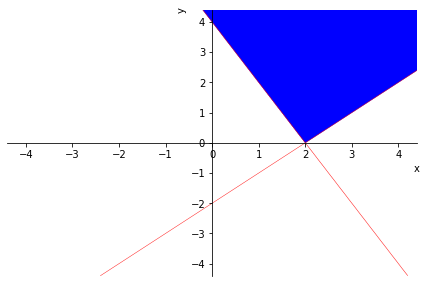

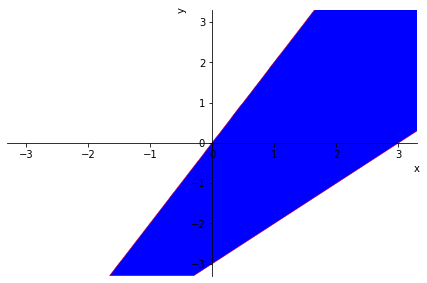

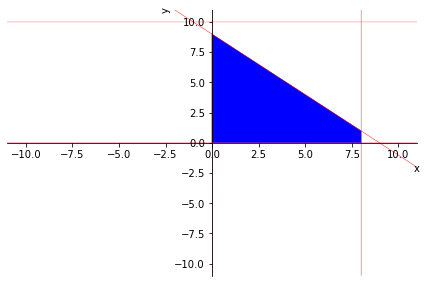

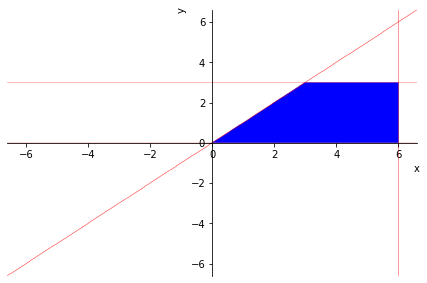

In [3]:
#p17.e2.1

sist_latex = [
            [r'x-y \leq 2',r'2x+y \geq 4'],
            [r'x-3 \leq y',r'2x \geq y'],
            [r'0 \leq x',r'x \leq 8',r'0 \leq y',r'y \leq 10',r'x+y \leq 9'],
            [r'y \geq 0', r'y-x \leq 0', r'y \leq 3', r'x-6 \leq 0']
    
            ]

for s in sist_latex:
    display_latex(sistema_a_latex(s), raw=True)
    d = region_factible(s)
    
    d['plot'].show()

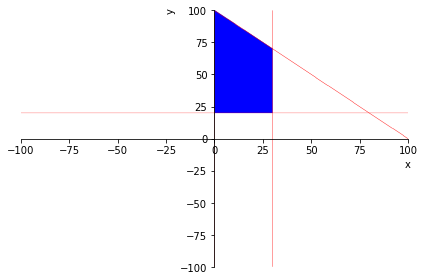

In [51]:
#p17.e2.2

sist_latex = [
            [r'x+y \leq 100',r'x \leq 30', r'y \geq 20', r'x \geq 0'],
    
            ]

for s in sist_latex:
    display_latex(sistema_a_latex(s), raw=True)
    d = region_factible(s)
    
    d['plot'].show()

min z=4.8 x + 7.2 y
s.a:


Región factible:


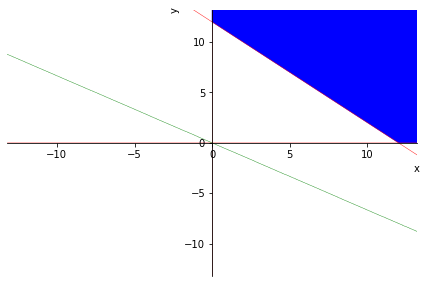

Vértices y valor de la función:


Solución:


     con: array([], dtype=float64)
     fun: 57.599999999999994
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 0., 12.,  0.])
  status: 0
 success: True
       x: array([12.,  0.])

In [89]:
#p17.e3.1 a 5.4

prob = [
#         [[r'x + y \leq 120 ',r'x \leq 85',r'y \leq 75', r'x \geq 0', r'y \geq 0'],3*x+4.5*y,'max'],
#     [[r'x \geq y ',r'x \leq 120',r'x + y \geq 60',r'x + y \leq 200', r'x \geq 0', r'y \geq 0'],900*x+700*y,'min'],
#     [[r'x+y \geq 50 ', r'x+y \leq 150 ',r' x \geq y',r'x \leq 100'],450*x+100*y,'min'],
#         [[r'3x+2y \geq 18 ', r'2x+8y \geq 32 ',r' x \geq 0',r'y \geq 0'],7000*x+10000*y,'min'],
#             [[r'3x+y \geq 12 ', r'2x+y \geq 10 ',r' x \geq 0',r'y \geq 0'],3*x+4*y,'min'],
#         [[r'2x+y \leq 230 ', r'x+2y \leq 250 ',r' x \geq 0',r' y \geq 0', r'y \leq 120'],2*x+4*y,'min'],
#      [[r'x+y \leq 200 ', r'x+y \geq 25 ',r'x \geq y ',r' x \geq 10',r' y \geq 20'],2*x+3*y,'min'],
         [[r'x+y \geq 12 ', r' x \geq 0',r' y \geq 0'],4.8*x+7.2*y,'min'],


       ]

for p in prob :
    sist_latex, funcion, tipo = p
    display(sol_prog_lineal(sist_latex, funcion, tipo))
#     sol_prog_lineal(sist_latex, funcion, tipo)

In [77]:
txt ='Optimization failed. The problem appears to be unbounded.'
txt.find('unbounded')

max z=x + y
s.a:


Región factible:


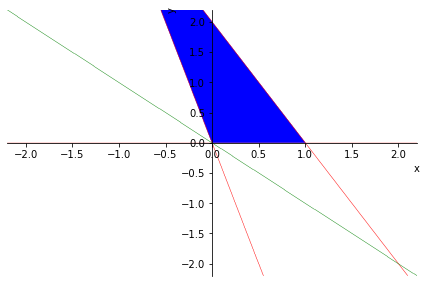

Vértices y valor de la función:


Solución:


max z=x + 3 y
s.a:


Región factible:


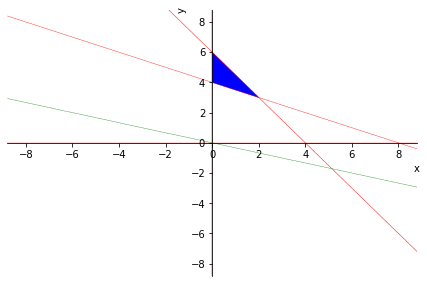

Vértices y valor de la función:


Solución:


max z=x + y
s.a:


Región factible:


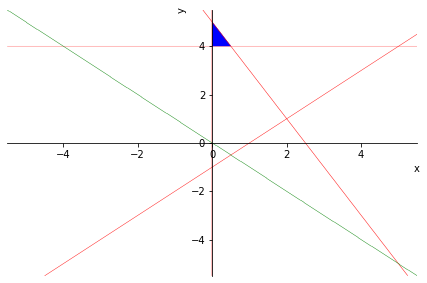

Vértices y valor de la función:


Solución:


max z=4 x + 3 y
s.a:


Región factible:


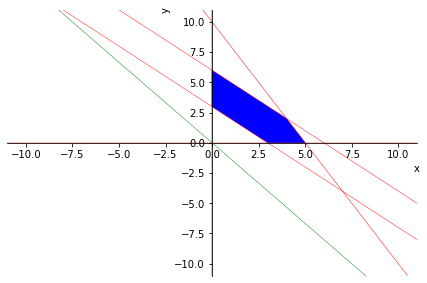

Vértices y valor de la función:


Solución:


max z=2 x + 3 y
s.a:


Región factible:


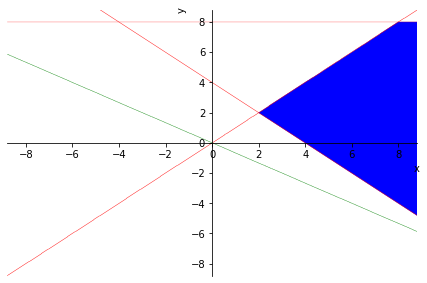

Vértices y valor de la función:


Solución:


'Problema no acotado'

min z=2 x + 3 y
s.a:


Región factible:


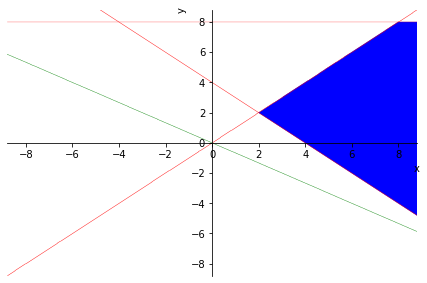

Vértices y valor de la función:


Solución:


'Problema no acotado'

max z=25 x + 20 y
s.a:


Región factible:


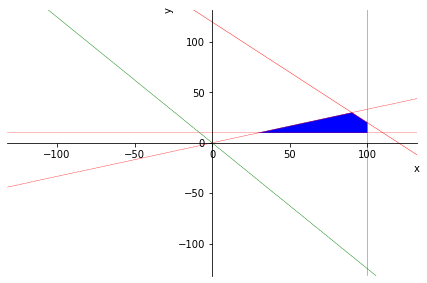

Vértices y valor de la función:


Solución:


min z=2 x + y
s.a:


Región factible:


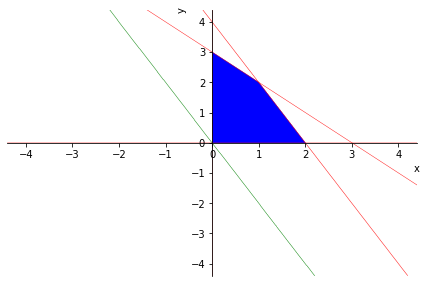

Vértices y valor de la función:


Solución:


max z=2 x + y
s.a:


Región factible:


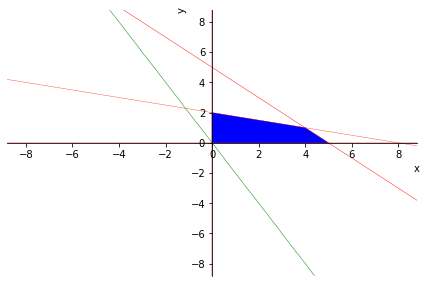

Vértices y valor de la función:


Solución:


min z=x + 6 y
s.a:


Región factible:


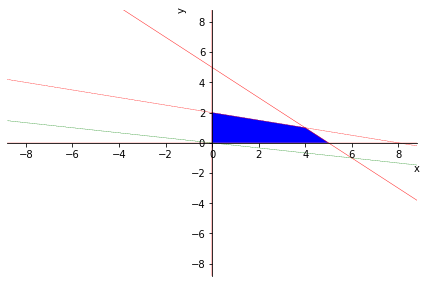

Vértices y valor de la función:


Solución:


In [10]:
#p19.e1 a 8

prob = [
    [[r'2x + y \leq 2 ',r' 4x + y \geq 0',r'y \geq 0'],x+y,'max'],
    [[r'3x \leq 12 -2y ',r'2y \geq 8-x',r'x \geq 0',r'y \geq 0'],x+3*y,'max'],
    [[r'y+2x-5 \leq 0',r'y-x+1 \geq 0',r'x \geq 0',r'y-4 \geq 0'],x+y,'max'],
    [[r'x+y \leq 6',r'2x+y \leq 10',r'x+y \geq 3',r'x \geq 0',r'y \geq 0'],4*x+3*y,'max'],
    [[r'y \leq 8',r'x-y \geq 0',r'x+y \geq 4'],2*x+3*y,'max'],
        [[r'y \leq 8',r'x-y \geq 0',r'x+y \geq 4'],2*x+3*y,'min'],
    [[r'x+y \leq 120',r'3y \leq x',r'x \leq 100',r'y \geq 10'],25*x+20*y,'max'],
    [[r'2x+y \leq 4',r'x+y \leq 3',r'x \geq 0',r'y \geq 0'],2*x+y,'min'],
    [[r'x+y \leq 5',r'x+4y \leq 8',r'x \geq 0',r'y \geq 0'],2*x+y,'max'],
        [[r'x+y \leq 5',r'x+4y \leq 8',r'x \geq 0',r'y \geq 0'],x+6*y,'min'],

     
      
       ]

for p in prob :
    sist_latex, funcion, tipo = p
#     display(sol_prog_lineal(sist_latex, funcion, tipo))
    sol_prog_lineal(sist_latex, funcion, tipo)

    
    
    


max z=20 x + 30 y
s.a:


Región factible:


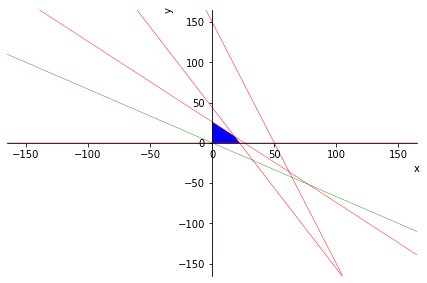

Vértices y valor de la función:


Solución:


     con: array([], dtype=float64)
     fun: -780.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([124.,   9.,   0.,   0.,  26.])
  status: 0
 success: True
       x: array([ 0., 26.])

In [14]:
#p19.e9a34

prob = [
#     [[r'2x + 3y \leq 480 ',r'x + 3y \leq 360',r'y \geq 0',r'x \geq 0'],400*x+500*y,'max'],
#     [[r'x + y \leq 300 ',r'y \geq x',r'x \geq 100'],50*x+60*y,'max'],
#     [[r'100x + 200y \leq 10000 ',r'30x + 40y \leq 2400 ', r'y \geq 0',r'x \geq 0',r'y \leq 100',r'x \leq 100'],1000*y+750*x,'max'],
#     [[r'x + y \geq 25 ',r'20x + 40y \leq 1200',r'y \geq 0',r'x \geq 0'],6*x+9*y,'min'],
#     [[r'4x + 2y \leq 110 ',r'2x + 3y \leq 85',r'y \geq 0',r'x \geq 0'],5*x+6*y,'max'],
    [[r'3x + y \leq 150 ',r'x + y/2 \leq 22',r'x+y \leq 26',r'x \geq 0',r'y \geq 0'],20*x+30*y,'max'],
    # hasta el 14 hechos
        
       ]

for p in prob :
    sist_latex, funcion, tipo = p
    display(sol_prog_lineal(sist_latex, funcion, tipo))

In [4]:
from scipy import optimize
import scipy
scipy.__version__

'1.5.2'

In [5]:
# Ejemplo de uso de optimización con scipy

from scipy import optimize

"""
    minimizar z=-30x-50y es lo mismo que maximizar z=300x+500y y cambiar el signo
    s.a:
        x+y<=10 <-> -x-y>=-10
        x+3y<=20
        
    Por tanto hay que traducir el problema a minimizar y todas las restricciones a <= 
    
"""

sol = optimize.linprog(
    c = [-30, -50], 
    A_ub=[[1, 1],[1,3]], 
    b_ub=[10,20],
    method='simplex'
)

pprint(-(sol["fun"]))

400.0
